In [3]:
import os
import sys
import difflib
import shutil
from glob import glob
import pandas as pd
import numpy as np

import music21

sys.path.append('..')
from src.utils import get_chord_progressions, calculate_melody_results, flatten_chord_progression
from src.weimar_db_utils import flatten_wdb_chord_progression, get_offset, create_note_info
from src.melody import Melody

source = 'Weimar DB'

input_folder = '../data/Complete Examples Melodies Auto/v1.2/Weimar DB'
filepaths = [y for x in os.walk(input_folder) for y in glob(os.path.join(x[0], '*.mid'))]
cps = get_chord_progressions('..')

In [43]:
file_idx = 96

In [44]:
filepaths[file_idx:106] # final idx is 106

['../data/Complete Examples Melodies Auto/v1.2/Weimar DB/Wayne Shorter - Eighty-One.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Weimar DB/Wayne Shorter - Esp.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Weimar DB/Wayne Shorter - Footprints.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Weimar DB/Wayne Shorter - Ju-Ju.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Weimar DB/Wayne Shorter - Speak No Evil.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Weimar DB/Woody Shaw - Imagination.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Weimar DB/Wynton Marsalis - April In Paris.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Weimar DB/Zoot Sims - All The Things You Are.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Weimar DB/Zoot Sims - Night And Day (1).mid',
 '../data/Complete Examples Melodies Auto/v1.2/Weimar DB/Zoot Sims - Night And Day (2).mid']

In [45]:
performer = 'Wayne Shorter'
song_name = "Eighty-One"
filename = filepaths[file_idx]

print(filename)

if performer.lower() not in filename.lower() or song_name.lower() not in filename.lower():
    raise Exception('Names do not match!!!')

../data/Complete Examples Melodies Auto/v1.2/Weimar DB/Wayne Shorter - Eighty-One.mid


In [46]:
info = pd.read_csv('..' + '/data/sources/WeimarDB/weimar_db_melody_info.csv')
rows = info[(info['performer'] == performer) & (info['title'] == song_name)]

wdb_info = pd.read_csv('../data/sources/WeimarDB/weimar_db_melody_info_with_pitch.csv')
song_wdb_info = wdb_info[
    (wdb_info['performer'] == performer) &
    (wdb_info['title'] == song_name)
]

if len(song_wdb_info) == 0:
    raise Exception('Song not found!')

if song_wdb_info['melid'].nunique() > 1:
    print('Duplicate!!!!!', song_wdb_info['melid'].unique())
    melid_idx = input('Enter correct index ')
    melid = list(song_wdb_info['melid'].unique())[int(melid_idx)]
    
    song_wdb_info = song_wdb_info[song_wdb_info['melid'] == melid]
    
note_info = create_note_info(song_wdb_info)

In [47]:
melody = Melody(filename, '1.2')
melody.setup()

melody.time_signature = (4,4)
melody.key = music21.key.Key('F')

melody.note_info = create_note_info(song_wdb_info)
melody.set_song_structure(cps[melody.song_name])

melody.min_measure = melody.note_info.measure.min()
melody.max_measure = int(np.ceil((melody.note_info.measure + (
        (melody.note_info.offset + melody.note_info.quant_duration) / melody.FINAL_TICKS_PER_BEAT /
        melody.time_signature[0])).max())) - 1

In [48]:
melody.save_key()

In [49]:
melody.align_key()

In [50]:
melody.key.name

'F major'

In [51]:
melody.chord_progression_key + " " + ("major" if not melody.chord_progression_minor else 'minor')

'F major'

In [52]:
melody.transpose_semitones

0

In [53]:
melody.transpose()

In [54]:
starting_measure = song_wdb_info[song_wdb_info['form'] == 'A1'].iloc[0]['bar']
melody.starting_measure = starting_measure

print(starting_measure)

1


In [55]:
linear_wdb_cp = flatten_wdb_chord_progression(performer, song_name, '..')
linear_cp = flatten_chord_progression(cps[melody.song_name])
sm = difflib.SequenceMatcher(None, linear_cp, linear_wdb_cp[:len(linear_cp)])
s = sm.ratio()

print(s)
print('--------')
print(len(linear_cp), len(linear_wdb_cp))
for p in zip(linear_cp, linear_wdb_cp):
    print(p)

['A1', 'A1', 'A1', 'A1', 'A1', 'A1']
0.0
--------
96 288
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('C7sus', 'Csus7')
('C7sus', 'Csus7')
('C7sus', 'Csus7')
('C7sus', 'Csus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('Bb7sus', 'Bbsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')
('F7sus', 'Fsus7')

In [56]:
melody.split_melody(True)

True

In [16]:
results = calculate_melody_results(melody)
hcms = [(k, res['harmonic_consistency_mean']) for k, res in results.items()]
for i, hcm in hcms:
    print(i, hcm)

0 0.5421146953405018


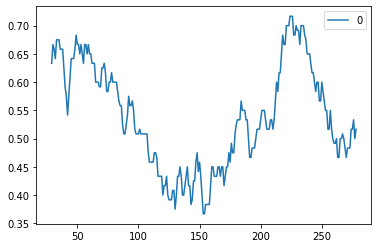

In [17]:
hcs = [(k, res['harmonic_consistency']) for k, res in results.items()]
for i, hc in hcs:
    pd.Series(hc).rolling(30).mean().plot(label=i, legend=True)

In [18]:
# for c in info[info['title'] == 'Dolores']['chord_changes'].drop_duplicates().values:
#     print(c)
#     print('-----------')

In [19]:
gtg = input('Good to go? ')

if gtg == 'g':
    print('Finalising')
    for i, res in results.items():
        folder_midi = f'../data/split_melody/v1.2/{source}/'
        folder_csv = f'../data/split_melody_data/v1.2/{source}/'

        src_midi = folder_midi + res['out_filename']
        dst_midi = src_midi.replace('split_melody/v1.2', 'finalised/midi')


        src_csv = folder_csv + res['out_filename'].replace('.mid', '.csv')
        dst_csv = src_csv.replace('split_melody_data/v1.2', 'finalised/csv')

        if not os.path.exists(os.path.dirname(dst_midi)):
            os.makedirs(os.path.dirname(dst_midi))

        if not os.path.exists(os.path.dirname(dst_csv)):
            os.makedirs(os.path.dirname(dst_csv))

        shutil.copyfile(src_midi, dst_midi)
        shutil.copyfile(src_csv, dst_csv)

Good to go? a


Check file inconsistencies

In [20]:
split_midi_folder = '../data/split_melody/v1.2/Weimar DB/'
split_midi_filepaths = [os.path.basename(y) for x in os.walk(split_midi_folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [21]:
split_csv_folder = '../data/split_melody_data/v1.2/Weimar DB/'
split_csv_filepaths = [os.path.basename(y) for x in os.walk(split_csv_folder) for y in glob(os.path.join(x[0], '*.csv'))]

In [22]:
fin_midi_folder = '../data/finalised/midi/Weimar DB/'
fin_midi_filepaths = [os.path.basename(y) for x in os.walk(fin_midi_folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [23]:
fin_csv_folder = '../data/finalised/csv/Weimar DB/'
fin_csv_filepaths = [os.path.basename(y) for x in os.walk(fin_csv_folder) for y in glob(os.path.join(x[0], '*.csv'))]

In [24]:
len(split_midi_filepaths), len(split_csv_filepaths)

(283, 301)

In [25]:
len(fin_midi_filepaths), len(fin_csv_filepaths)

(267, 267)

In [26]:
for a,b in zip(sorted(fin_midi_filepaths), sorted(fin_csv_filepaths)):
    if a.replace('.mid', '') != b.replace('.csv', ''):
        print(a,b)

In [27]:
df = pd.read_csv('/home/manu/Downloads/Thesis - Jazz Dataset - Sheet8.csv', names=['title', 'sm', 'gr'])

In [28]:
sheet = [n.replace('Weimar DB/' , '') for n in list(df.dropna()['title'].values)]

In [29]:
import re

fin = [re.sub(r'-[0-9]*-', '', f.replace('.csv', '')).strip() for f in fin_csv_filepaths]

set(sheet).difference(set(fin))

{"Zoot Sims - Night And Day (2)'"}

In [30]:
pd.Series(fin).value_counts().sort_index()

Art Pepper - Anthropology                   4
Ben Webster - Bye Bye Blackbird             3
Ben Webster - Night And Day                 2
Benny Carter - Just Friends                 3
Benny Carter - Long Ago And Far Away (1)    1
                                           ..
Woody Shaw - Imagination                    1
Wynton Marsalis - April In Paris            2
Zoot Sims - All The Things You Are          1
Zoot Sims - Night And Day (1)               2
Zoot Sims - Night And Day (2)               1
Length: 94, dtype: int64

In [31]:
df['t'] = df['title'].str.replace('Weimar DB/', '')

In [32]:
x = df.dropna()[['t', 'gr']].sort_values('t')['gr'].values

In [33]:
y = pd.Series(fin).value_counts().sort_index().values

In [34]:
for i, w in enumerate(zip(x,y)):
    if w[0] != w[1]:
        print(i)

33


In [35]:
df.dropna()[['t', 'gr']].sort_values('t').iloc[33]

t     David Murray - Ask Me Now
gr                          2.0
Name: 36, dtype: object